/var/folders/0h/4vg1qpl143j0x6hzjvsktsqm0000gn/T/ipykernel_88398/1773350298.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver') #크롬 웹드라이버 실행


<html lang="ko" data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"><head>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
    <meta name="viewport" content="width=1080px,maximum-scale=2.0,minimum-scale=0.4,user-scalable=yes">
    <meta property="og:image" content="https://imgsports.pstatic.net/images/mobile/common/NAVERsports.png">
    <meta property="og:title" content="네이버 스포츠">
    <meta property="og:description" content="스포츠의 시작과 끝!">
    <meta property="og:url" content="sports.news.naver.com/volleyball/record/index?category=wkovo&amp;year=2021&amp;tab=team">
    
        
        
            <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.sports/resources/pc/2022/04/14/154318/css/common_loose_new.css">

            <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/st
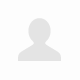
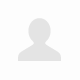

<html data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36" lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=1080px,maximum-scale=2.0,minimum-scale=0.4,user-scalable=yes" name="viewport"/>
<meta content="https://imgsports.pstatic.net/images/mobile/common/NAVERsports.png" property="og:image"/>
<meta content="네이버 스포츠" property="og:title"/>
<meta content="스포츠의 시작과 끝!" property="og:description"/>
<meta content="sports.news.naver.com/volleyball/record/index?category=wkovo&amp;year=2021&amp;tab=team" property="og:url"/>
<link href="https://ssl.pstatic.net/static.sports/resources/pc/2022/04/14/154318/css/common_loose_new.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.sports/resources/pc/2022/04/14/154318/css/volleyball_gamecenter.css" rel="stylesheet" type="text
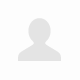
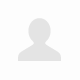

In [2]:
!pip install selenium #셀레니움 설정
from selenium import webdriver #셀레니움의 webdriver 모듈 인포트
driver=webdriver.Chrome('./chromedriver') #크롬 웹드라이버 실행
url = 'https://sports.news.naver.com/volleyball/record/index?category=wkovo&year=2021'
driver.get(url) #크롬 웹드라이버에서 url 실행
from bs4 import BeautifulSoup
html=driver.page_source
print(html)
soup=BeautifulSoup(html, 'lxml')
soup

In [3]:
content = soup.find('div',{'class':'tbl_box type2'})

In [4]:
# title
title = soup.find('h4', {'class':'h_player_w'}).find('span').string
title = str(title)
print(title)

여자부 선수기록


In [5]:
# category
category_tag_list = content.find('thead').find_all('span')
category = []
for ind in range(0, len(category_tag_list)):
  category.append(str(category_tag_list[ind].string))
  
print(category)

['순위', '선수', '득점', '공격성공률', '서브', '블로킹(세트당)', '수비(세트당)', '세트(세트당)', '리시브효율']


In [6]:
# rank
rank = content.find_all('th')

rank_list = []
for i in rank:
  try:
    int_list =int(i.string)
    rank_list.append(str(int_list))
  except:
    pass
print(rank_list)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '11', '13', '14', '15', '16', '17', '18', '19', '20']


In [7]:
# player
player = content.find_all('td', {'class':'ply'})
player_list=[]

for i in player :
  span_all = i.find_all('span')
  span_emblem = i.find_all('span', {'class': 'emblem'})
  ply_list = list(set(span_all)-set(span_emblem))
  # print(span_all)
  for t in ply_list:
    try:
      '<span>(' in t.string
    except:
      name = str(t)[6:].split(' ')[0] 
      team = str(t.find('span').string)
      detail = name + ' ' + team
      player_list.append(str(detail))
  
print(player_list)

['모마 (GS칼텍스)', '켈시 (한국도로공사)', '캣벨 (흥국생명)', '야스민 (현대건설)', '옐레나 (KGC인삼공사)', '엘리자벳 (페퍼저축은행)', '양효진 (현대건설)', '박정아 (한국도로공사)', '김희진 (IBK기업은행)', '이소영 (KGC인삼공사)', '강소휘 (GS칼텍스)', '표승주 (IBK기업은행)', '김미연 (흥국생명)', '유서연 (GS칼텍스)', '김주향 (IBK기업은행)', '이한비 (페퍼저축은행)', '배유나 (한국도로공사)', '이다현 (현대건설)', '이주아 (흥국생명)', '박경현 (페퍼저축은행)']


In [8]:
# point
td_list = content.find_all('td')
point = []
# print(td_list)
for i in td_list :
  if len(i.find_all('strong')):
    point.append(str(i.find('strong').string))

print(point)

['819', '775', '773', '674', '672', '598', '502', '440', '398', '377', '357', '357', '298', '294', '266', '262', '256', '246', '243', '242']


In [9]:
# other column

success_list = []
serve_list = []
blocking_list = []
dig_list = []
set_list = []
reserve_list = []

for i, list in enumerate(td_list):
  span_list = list.find_all('span')
  if (i % 8 == 2):
    success_list.append(str(span_list[0].string))
  elif (i % 8 == 3):
    serve_list.append(str(span_list[0].string))
  elif (i % 8 == 4):
    blocking_list.append(str(span_list[0].string))
  elif (i % 8 == 5):
    dig_list.append(str(span_list[0].string))
  elif (i % 8 == 6):
    set_list.append(str(span_list[0].string))
  elif (i % 8 == 7):
    reserve_list.append(str(span_list[0].string))

print(success_list)
print(serve_list)
print(blocking_list)
print(dig_list)
print(set_list)
print(reserve_list)

['47.30', '42.19', '36.52', '42.81', '39.44', '41.45', '52.48', '34.08', '36.08', '35.72', '36.67', '37.24', '33.29', '38.92', '33.01', '30.13', '41.80', '46.88', '35.69', '35.57']
['0.41', '0.12', '0.16', '0.44', '0.16', '0.17', '0.20', '0.11', '0.15', '0.20', '0.28', '0.16', '0.24', '0.20', '0.09', '0.10', '0.23', '0.08', '0.22', '0.16']
['0.36', '0.60', '0.42', '0.43', '0.58', '0.49', '0.74', '0.30', '0.47', '0.28', '0.21', '0.30', '0.19', '0.13', '0.22', '0.12', '0.65', '0.74', '0.72', '0.10']
['2.40', '2.51', '3.13', '2.06', '3.16', '2.00', '1.57', '2.31', '2.21', '6.07', '5.46', '5.00', '5.48', '5.57', '4.47', '5.12', '1.46', '1.14', '1.12', '4.57']
['0.10', '0.01', '0.08', '0.09', '0.10', '0.03', '0.24', '0.11', '0.14', '0.30', '0.20', '0.23', '0.32', '0.27', '0.11', '0.20', '0.24', '0.15', '0.18', '0.23']
['33.33', '0.00', '0.00', '100.00', '14.29', '0.00', '40.54', '7.09', '0.00', '40.06', '33.07', '27.78', '25.57', '36.13', '26.87', '29.35', '28.00', '37.04', '32.50', '22.13'

In [10]:
import pandas as pd

test= zip(rank_list, player_list, point, success_list, serve_list, blocking_list, dig_list, set_list, reserve_list)

dataset = []

for zzz in test:
    dataset.append(zzz)
# df = pd.DataFrame(dataset, columns=category)
# print(df)

In [11]:
df = pd.DataFrame(dataset, columns=category)
print(df)

    순위             선수   득점  공격성공률    서브 블로킹(세트당) 수비(세트당) 세트(세트당)   리시브효율
0    1     모마 (GS칼텍스)  819  47.30  0.41     0.36    2.40    0.10   33.33
1    2    켈시 (한국도로공사)  775  42.19  0.12     0.60    2.51    0.01    0.00
2    3      캣벨 (흥국생명)  773  36.52  0.16     0.42    3.13    0.08    0.00
3    4     야스민 (현대건설)  674  42.81  0.44     0.43    2.06    0.09  100.00
4    5  옐레나 (KGC인삼공사)  672  39.44  0.16     0.58    3.16    0.10   14.29
5    6  엘리자벳 (페퍼저축은행)  598  41.45  0.17     0.49    2.00    0.03    0.00
6    7     양효진 (현대건설)  502  52.48  0.20     0.74    1.57    0.24   40.54
7    8   박정아 (한국도로공사)  440  34.08  0.11     0.30    2.31    0.11    7.09
8    9  김희진 (IBK기업은행)  398  36.08  0.15     0.47    2.21    0.14    0.00
9   10  이소영 (KGC인삼공사)  377  35.72  0.20     0.28    6.07    0.30   40.06
10  11    강소휘 (GS칼텍스)  357  36.67  0.28     0.21    5.46    0.20   33.07
11  11  표승주 (IBK기업은행)  357  37.24  0.16     0.30    5.00    0.23   27.78
12  13     김미연 (흥국생명)  298  33.29  0.24     0.19   

In [12]:
!pip install konlpy
from konlpy.tag import Okt
from collections import Counter

In [13]:
rank_corpus = "".join(df['순위'].tolist())
player_corpus = "".join(df['선수'].tolist())
# content_corpus = "".join(df['content_text'].tolist())
print(player_corpus)

모마 (GS칼텍스)켈시 (한국도로공사)캣벨 (흥국생명)야스민 (현대건설)옐레나 (KGC인삼공사)엘리자벳 (페퍼저축은행)양효진 (현대건설)박정아 (한국도로공사)김희진 (IBK기업은행)이소영 (KGC인삼공사)강소휘 (GS칼텍스)표승주 (IBK기업은행)김미연 (흥국생명)유서연 (GS칼텍스)김주향 (IBK기업은행)이한비 (페퍼저축은행)배유나 (한국도로공사)이다현 (현대건설)이주아 (흥국생명)박경현 (페퍼저축은행)


In [14]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 1919.5, 1079.5, -0.5)

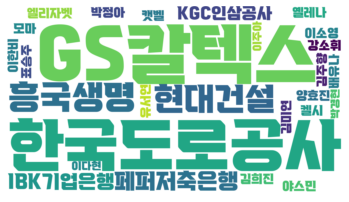

In [17]:
wordcloud=WordCloud(font_path="/Library/Fonts/비트로 코어 TTF.ttf", background_color='white', width=1920,
height=1080).generate(player_corpus)
fig=plt.figure()
plt.imshow(wordcloud, interpolation='bilinear', cmap="YlOrBr")
plt.axis('off')